# 决策树的学习

07/12


## 1.1决策树的建模流程

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
result = clf.score(x_test, y_test)

### 2.1决策树的参数理解

In [ ]:
'''
参数： criterion{“gini”, “entropy”}, default=”gini”
解释：决定不纯度的计算方法，不纯度度量，默认是gini
'''



In [1]:
# 导入相关模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [3]:
# 加载数据
wine = load_wine()


In [4]:
wine.data.shape

(178, 13)

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
# 以一张表的形式展开
import pandas as pd
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis = 1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
# 数据集的划分
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size = 0.3)

In [10]:
Xtrain.shape

(124, 13)

In [11]:
Xtest.shape

(54, 13)

In [12]:
# 建立模型
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.9259259259259259

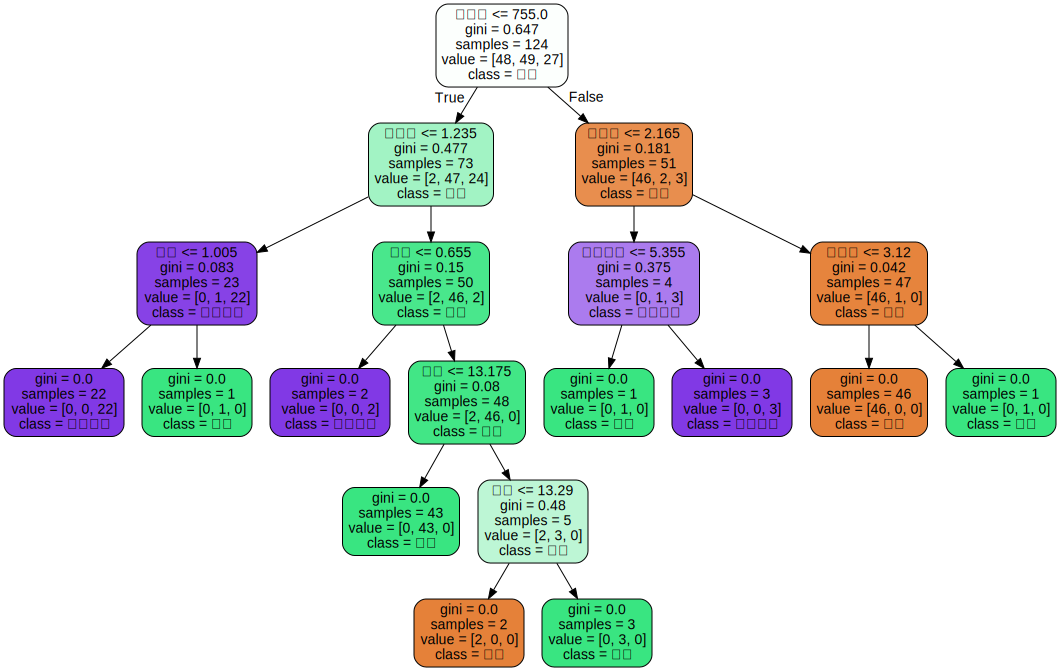

In [14]:
# 画出决策树，可视化
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
class_name = ['琴酒','雪莉','贝尔摩德']

import graphviz

dot_data = tree.export_graphviz(
    clf,
    feature_names = feature_name,
    class_names = class_name,
    filled = True,
    rounded = True
)
graph = graphviz.Source(dot_data)
graph

In [15]:
# 决策树的探索

# 特征的重要性显示
clf.feature_importances_

array([0.04781064, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.38862478, 0.        , 0.02441394, 0.01870851,
       0.06984149, 0.        , 0.45060064])

In [16]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.04781063501642865),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3886247832953927),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.02441394128498485),
 ('颜色强度', 0.018708509354254676),
 ('色调', 0.0698414864183277),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.45060064463061156)]

In [17]:
# 保证一致性，设置random_state
clf = tree.DecisionTreeClassifier(random_state = 30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

In [18]:
score

0.9444444444444444

In [19]:
'''
参数说明： splitter{“best","random"},
解释：选择划分的策略，默认为best。即优先选用更重要的特征进行分支
'''

clf = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 30,
    splitter = 'random'
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

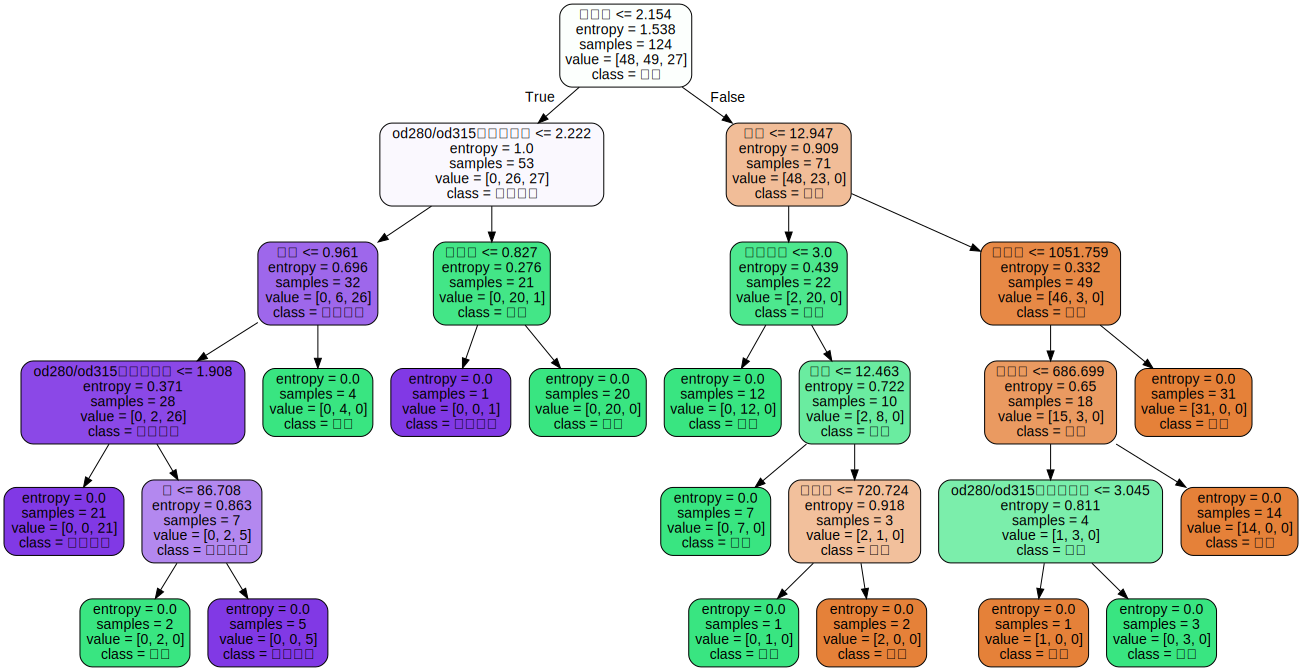

In [20]:
# 可视化

import graphviz
dot_data = tree.export_graphviz(
    clf,
    feature_names = feature_name,
    class_names = class_name,
    filled = True,
    rounded = True
)
graph = graphviz.Source(dot_data)
graph

In [21]:
# 判断模型对于训练集的拟合程度
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

In [25]:
'''
剪支参数：max_depth, min_samples_split, min_samples_split,max_features
解释：最大深度，最小样本数，最小分割数
'''

# 代码解释
clf = tree.DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 30,
    splitter = "random",
    max_depth = 3,
    min_samples_leaf = 10,
    min_samples_split = 10
)
clf = clf.fit(Xtrain, Ytrain)


In [27]:
clf.score(Xtrain, Ytrain)

0.8870967741935484

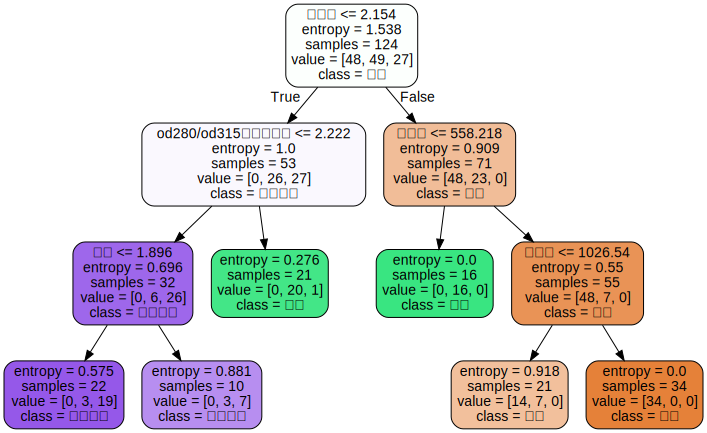

In [28]:
# 可视化
dot_data = tree.export_graphviz(
    clf,
    feature_names = feature_name,
    class_names = class_name,
    filled = True,
    rounded = True
)
graph = graphviz.Source(dot_data)
graph

In [29]:
clf.score(Xtest, Ytest)

0.8888888888888888

In [30]:
clf.score(Xtrain, Ytrain)

0.8870967741935484

### 2.1 确定最优的参数

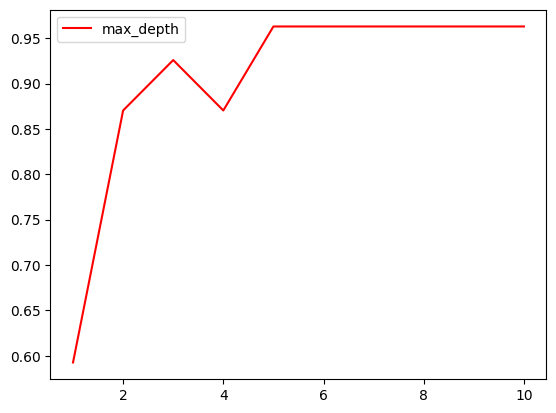

In [31]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
  clf = tree.DecisionTreeClassifier(
      criterion = 'entropy',
      random_state = 30,
      splitter = "random",
      max_depth = i+1
  )
  clf = clf.fit(Xtrain, Ytrain)
  score = clf.score(Xtest, Ytest)
  test.append(score)

plt.plot(range(1,11), test, color = 'r', label = 'max_depth')
plt.legend()
plt.show()


In [32]:
clf.predict(Xtest)

array([2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1])

In [33]:
clf.apply(Xtest)

array([ 4, 14,  7, 11, 11, 16,  4, 25,  4,  4,  4, 26,  6, 25,  4, 14, 25,
       11, 25, 11, 26, 25, 16, 25, 25,  4,  4,  4,  4, 11, 10,  8, 11,  4,
        4,  4,  4,  4, 25, 26, 11, 16, 11, 26,  4, 11,  7,  4,  4,  4, 11,
       11, 11, 11])